In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PORTFOLIO/Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [ ]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 15s - loss: 0.0354 - 15s/epoch - 435ms/step
Epoch 2/20
35/35 - 9s - loss: 0.0106 - 9s/epoch - 244ms/step
Epoch 3/20
35/35 - 6s - loss: 0.0087 - 6s/epoch - 177ms/step
Epoch 4/20
35/35 - 8s - loss: 0.0082 - 8s/epoch - 222ms/step
Epoch 5/20
35/35 - 7s - loss: 0.0075 - 7s/epoch - 196ms/step
Epoch 6/20
35/35 - 7s - loss: 0.0072 - 7s/epoch - 213ms/step
Epoch 7/20
35/35 - 7s - loss: 0.0072 - 7s/epoch - 207ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0067 - 7s/epoch - 190ms/step
Epoch 9/20
35/35 - 9s - loss: 0.0086 - 9s/epoch - 271ms/step
Epoch 10/20
35/35 - 7s - loss: 0.0059 - 7s/epoch - 209ms/step
Epoch 11/20
35/35 - 7s - loss: 0.0060 - 7s/epoch - 210ms/step
Epoch 12/20
35/35 - 9s - loss: 0.0056 - 9s/epoch - 268ms/step
Epoch 13/20
35/35 - 14s - loss: 0.0053 - 14s/epoch - 393ms/step
Epoch 14/20
35/35 - 11s - loss: 0.0070 - 11s/epoch - 323ms/step
Epoch 15/20
35/35 - 8s - loss: 0.0052 - 8s/epoch - 235ms/step
Epoch 16/20
35/35 - 6s - loss: 0.0045 - 6s/epoch - 184ms/step
Epoch 17/20

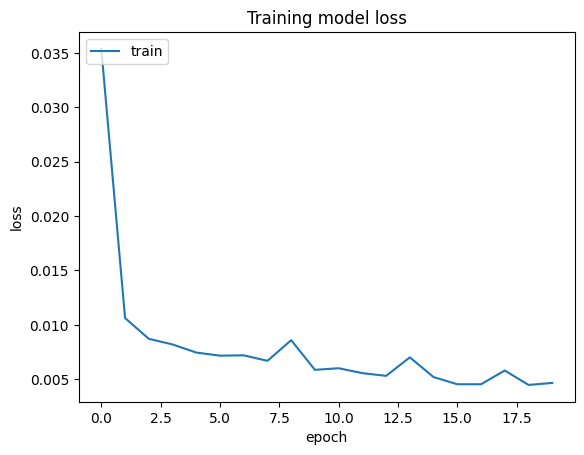

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
testData = pd.read_csv('/content/drive/MyDrive/PORTFOLIO/Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [ ]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 2s 92ms/step


array([[1.2030666],
       [1.2061275],
       [1.2170705],
       [1.2338642],
       [1.2483602],
       [1.2505116],
       [1.2396653],
       [1.2227261],
       [1.2105017],
       [1.2061021],
       [1.1994789],
       [1.1888977],
       [1.1789098],
       [1.1695613],
       [1.1666964],
       [1.1703098],
       [1.1867632],
       [1.2138696],
       [1.245897 ],
       [1.2783751],
       [1.2939835],
       [1.2934159],
       [1.2755188],
       [1.2475392],
       [1.2206295],
       [1.2036378],
       [1.1978827],
       [1.196464 ],
       [1.1899456],
       [1.1797547],
       [1.1680574],
       [1.1546698],
       [1.1351634],
       [1.1108799],
       [1.0992742],
       [1.1062955],
       [1.1264874],
       [1.1511657],
       [1.175433 ],
       [1.1893663],
       [1.2023219],
       [1.217219 ],
       [1.2343547],
       [1.2506785],
       [1.262307 ],
       [1.264942 ],
       [1.256578 ],
       [1.2476499],
       [1.2441046],
       [1.2483897],


In [ ]:
predicted_price = sc.inverse_transform(y_pred)

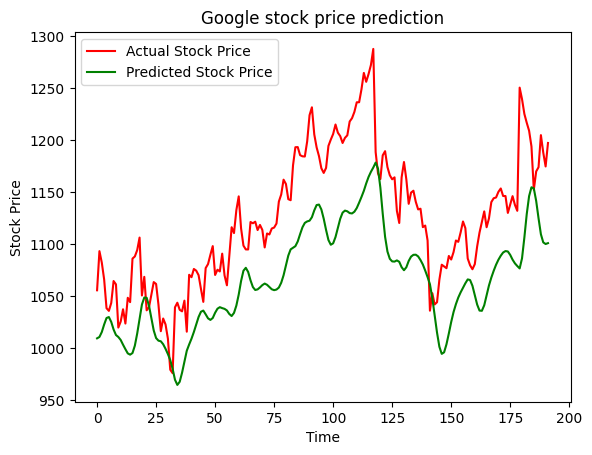

In [ ]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()